<a href="https://colab.research.google.com/github/asifshigri12/EDA-analysis-in-Pandas/blob/main/EDA_analysis_of_Tiatanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#What is EDA?
Exploratory data analysis (EDA) is used by data scientists to analyze and investigate data sets and summarize their main characteristics, often employing data visualization methods.

EDA helps determine how best to manipulate data sources to get the answers you need, making it easier for data scientists to discover patterns, spot anomalies, test a hypothesis, or check assumptions.




#Why is exploratory data analysis important in data science?
The main purpose of EDA is to help look at data before making any assumptions. It can help identify obvious errors, as well as better understand patterns within the data, detect outliers or anomalous events, find interesting relations among the variables.

Data scientists can use exploratory analysis to ensure the results they produce are valid and applicable to any desired business outcomes and goals. EDA also helps stakeholders by confirming they are asking the right questions. EDA can help answer questions about standard deviations, categorical variables, and confidence intervals. Once EDA is complete and insights are drawn, its features can then be used for more sophisticated data analysis or modeling, including machine learning.



#Types of exploratory data analysis
There are four primary types of EDA:

##Univariate non-graphical.
This is simplest form of data analysis, where the data being analyzed consists of just one variable. Since it’s a single variable, it doesn’t deal with causes or relationships. The main purpose of univariate analysis is to describe the data and find patterns that exist within it.
##Univariate graphical.
Non-graphical methods don’t provide a full picture of the data. Graphical methods are therefore required. Common types of univariate graphics include:
Count plots,Histograms, a bar plot in which each bar represents the frequency (count) or proportion (count/total count) of cases for a range of values.
Box plots, which graphically depict the five-number summary of minimum, first quartile, median, third quartile, and maximum.
##Multivariate nongraphical:
Multivariate data arises from more than one variable. Multivariate non-graphical EDA techniques generally show the relationship between two or more variables of the data through cross-tabulation or statistics.
##Multivariate graphical:
Multivariate data uses graphics to display relationships between two or more sets of data. The most used graphic is a grouped bar plot or bar chart with each group representing one level of one of the variables and each bar within a group representing the levels of the other variable.

# Exploratory Data Analysis - Predicting Survival on the Titanic

In [19]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_theme()
sns.set_style('whitegrid')
sns.set_palette(['#FF5F5D', '#3F7C85', '#00CCBF', '#72F2EB', '#747E7E'])

import plotly.express as px
# import plotly.graph_objects as go

# import warnings
# warnings.filterwarnings('ignore')

In [20]:
df_train = pd.read_csv('train.csv - train.csv.csv')

## 1. EDA

In [21]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [22]:
df_train.shape

(891, 12)

In [23]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [24]:
# possible of values for any column
df_train['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [25]:
# values with counts for any column
df_train['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [26]:
df_train['Embarked'].isnull().sum()

2

In [27]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [28]:
#a=[1,2,3,4,5,6]
#for i in a:
    #print(i)

In [29]:
for feature in df_train.columns:
    print(feature)
    print(df_train[feature].value_counts())
    print('---------------')

PassengerId
PassengerId
1      1
599    1
588    1
589    1
590    1
      ..
301    1
302    1
303    1
304    1
891    1
Name: count, Length: 891, dtype: int64
---------------
Survived
Survived
0    549
1    342
Name: count, dtype: int64
---------------
Pclass
Pclass
3    491
1    216
2    184
Name: count, dtype: int64
---------------
Name
Name
Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: count, Length: 891, dtype: int64
---------------
Sex
Sex
male      577
female    314
Name: count, dtype: int64
---------------
Age
Age
24.0

In [30]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


- Survived is a categorical feature with 0 or 1 values.
- Around 38% samples survived
- Most passengers  did not travel with parents or children.
- Nearly 30% of the passengers had siblings and/or spouse aboard?
- Fares varied significantly with few passengers  paying as high as $512.
- Few elderly passengers  within age range 65-80.

<Axes: >

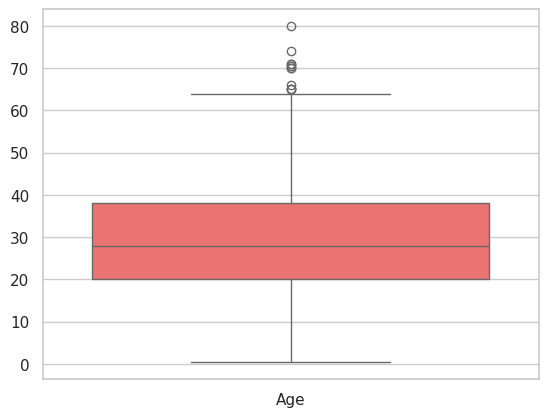

In [31]:
sns.boxplot(df_train[['Age']])

In [32]:
mean_age=df_train['Age'].mean()
std_age=df_train['Age'].std()

In [33]:
# Calculate z-scores
df_train['z_score_age'] = (df_train['Age'] - mean_age) / std_age

# Filter out the outliers where z-score is greater than 3 or less than -3
outliers = df_train[(df_train['z_score_age'] > 3) | (df_train['z_score_age'] < -3)]

# To view the outliers
print(outliers)

     PassengerId  Survived  Pclass                                  Name  \
630          631         1       1  Barkworth, Mr. Algernon Henry Wilson   
851          852         0       3                   Svensson, Mr. Johan   

      Sex   Age  SibSp  Parch  Ticket    Fare Cabin Embarked  z_score_age  
630  male  80.0      0      0   27042  30.000   A23        S     3.462699  
851  male  74.0      0      0  347060   7.775   NaN        S     3.049660  


In [34]:
df_train[df_train['Age']>60]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,z_score_age
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,NaN,S,2.498943
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,B30,C,2.430103
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C,2.843141
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q,2.808721
170,171,0,1,"Van der hoef, Mr. Wyckoff",male,61.0,0,0,111240,33.5000,B19,S,2.154744
252,253,0,1,"Stead, Mr. William Thomas",male,62.0,0,0,113514,26.5500,C87,S,2.223584
275,276,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0,1,0,13502,77.9583,D7,S,2.292423
280,281,0,3,"Duane, Mr. Frank",male,65.0,0,0,336439,7.7500,NaN,Q,2.430103
326,327,0,3,"Nysveen, Mr. Johan Hansen",male,61.0,0,0,345364,6.2375,NaN,S,2.154744
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S,2.361263


In [35]:
df_train.drop('z_score_age', axis=1, inplace=True)


In [36]:
df_train.describe(include=["O"])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [37]:
df_train.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

'PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'

- Insignificant Features?
- Cateogrical Features?
- Ordinal Features?
- Continuous Features?
- Discrete Features?

- **Insignificant:** Passenger ID, Name, Ticket, Cabin
- **Cateogrical:** Survived, Sex, Embarked
- **Ordinal:** Pclass
- **Continuous:** Age, Fare
- **Discrete:** SibSp, Parch

### Relationship of survived with Sex, Pclass, SibSp, Parch?

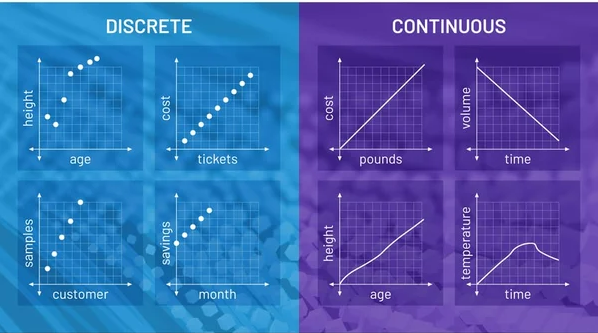

**Assumptions/ Questions**
- Women, children and upper-class passengers were more likely to have survived.
- Did people traveling in groups have more chances of survival?

In [38]:
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=False).sum()

,Sex,Survived
0,female,233
1,male,109


from matplotlib import pyplot as plt
_df_0['Survived'].plot(kind='hist', bins=20, title='Survived')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('Sex').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Survived'].plot(kind='line', figsize=(8, 4), title='Survived')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_3['Sex'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_3, x='Survived', y='Sex', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

## 2. EDA through visualization

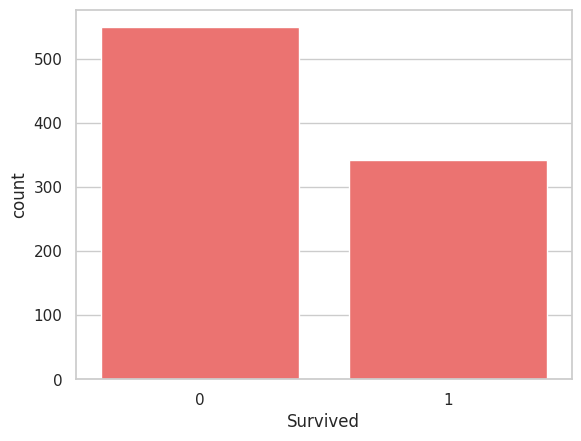

In [39]:
# single feature histogram --> data distribution
sns.countplot(data=df_train, x='Survived');  #.countplot tell us categories univariate

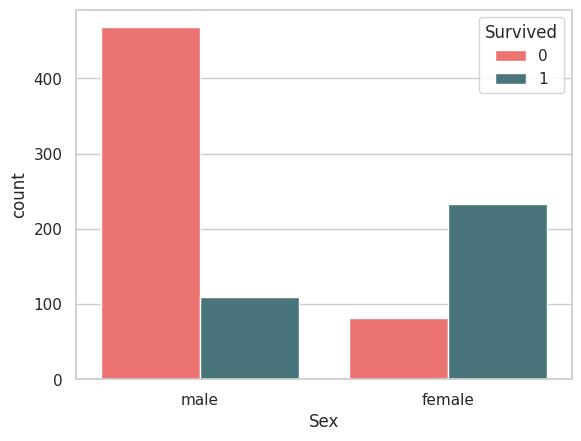

In [40]:
# using hue for sub-feature histograms --> data dependency distribution
sns.countplot(df_train, x='Sex', hue='Survived');

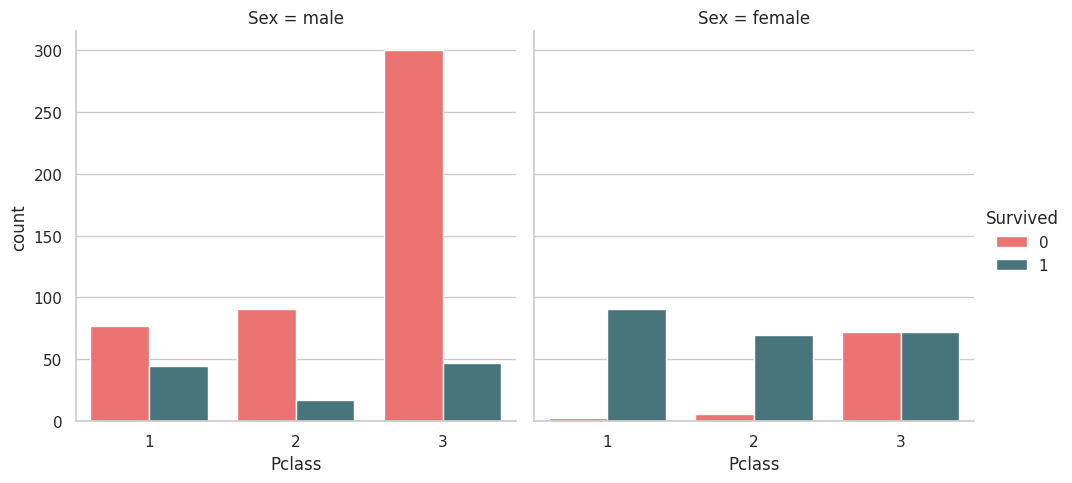

In [41]:
# adding a third feature into the analysis
sns.catplot(df_train, x='Pclass', col='Sex', hue="Survived", kind='count');

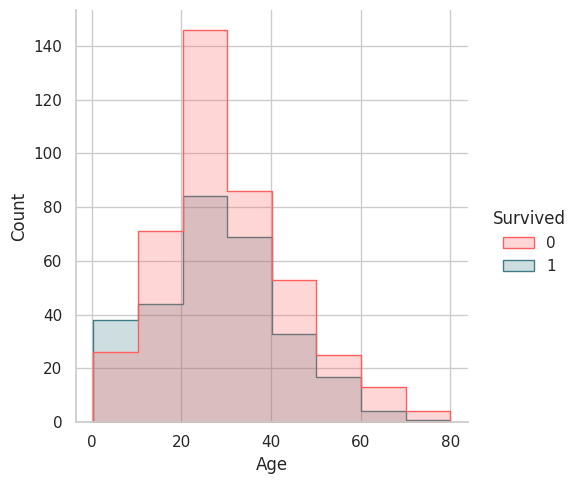

In [42]:
# Analysing numerical features
sns.displot(df_train, x="Age", hue="Survived", binwidth=10, element="step");

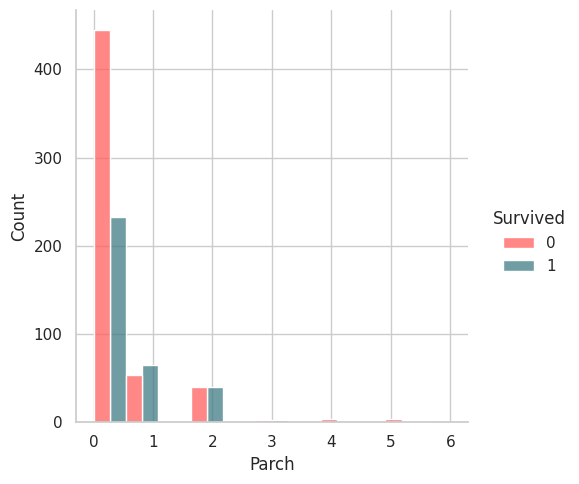

In [43]:
# for discrete and ordinal attributes
sns.displot(df_train, x="Parch", hue="Survived", multiple="dodge")

<Axes: >

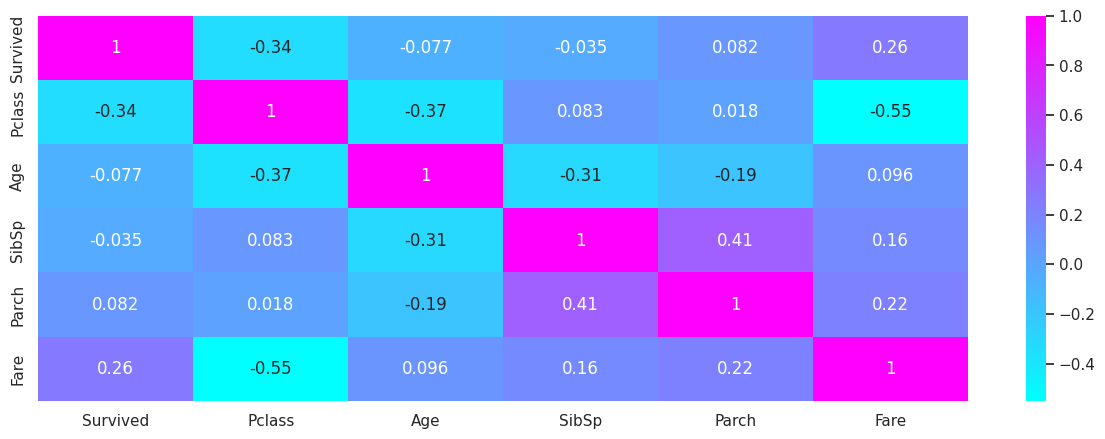

In [44]:
# heatmap for correlation between numerical attributes
plt.figure(figsize=(15,5))
sns.heatmap(df_train[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].corr(), cmap="cool", annot=True)

**References**
- https://www.kaggle.com/code/startupsci/titanic-data-science-solutions/notebook
- https://www.kaggle.com/code/surajkumar88/titanic-machine-learning-from-disaster-eda/notebook
- https://www.kaggle.com/code/pmarcelino/comprehensive-data-exploration-with-python/notebook